In [1]:
import fastf1 as ff1
import numpy as np
import matplotlib as mpl

from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection

import os

In [2]:
year = 2022
wknd = 3
ses = 'Q'
path = f'Differences/{year}/{wknd}/{ses}/'
if not os.path.exists(path):
  os.makedirs(path)
  print("Folder %s created!" % path)
else:
  print("Folder %s already exists" % path)

Folder Differences/2022/3/Q/ already exists


In [3]:
session = ff1.get_session(year, wknd, ses)
weekend = session.event
session.load()
lap_fast = session.laps.pick_fastest()
driver_fast = lap_fast.Driver


# Get telemetry data
x = lap_fast.telemetry['X']              # values for x-axis
y = lap_fast.telemetry['Y']              # values for y-axis
color_fast = lap_fast.telemetry['Speed']      # value to base color gradient on

req         WARNING 	

DEFAULT CACHE ENABLED!
	Cache directory: /Users/marcosmendes/Library/Caches/fastf1.
	Size: 730.97 MB
core           INFO 	Loading data for Australian Grand Prix - Qualifying [v3.0.7]
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '1', '11', '4', '44', '63', '3', '31', '55', '14', '10', '77', '22', '24', '47', '23', '20', '5', '6', '18']


In [4]:
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

In [5]:
las = session.drivers
las.remove(lap_fast.DriverNumber)


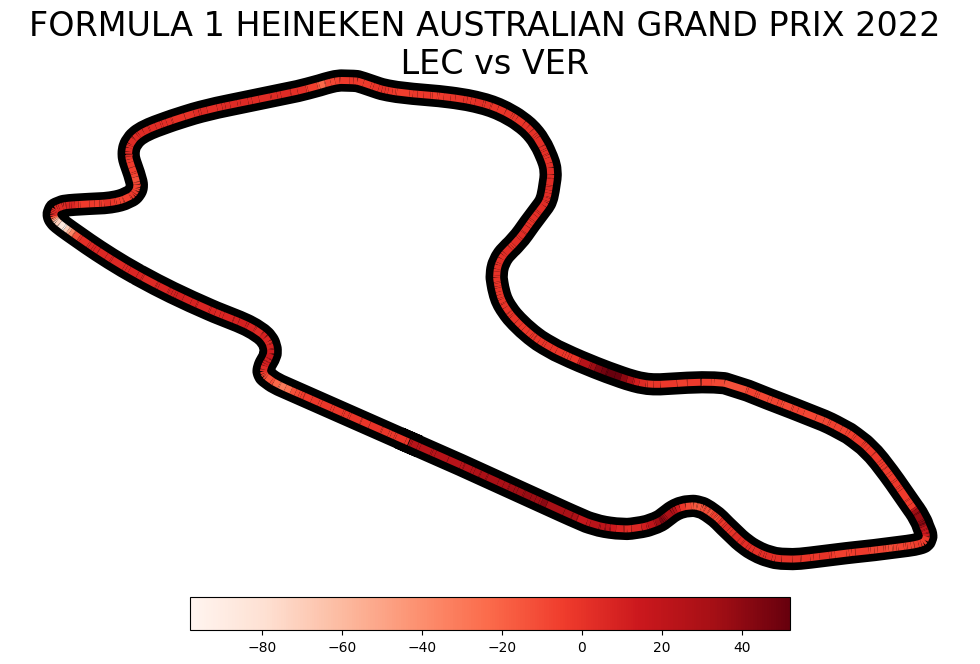

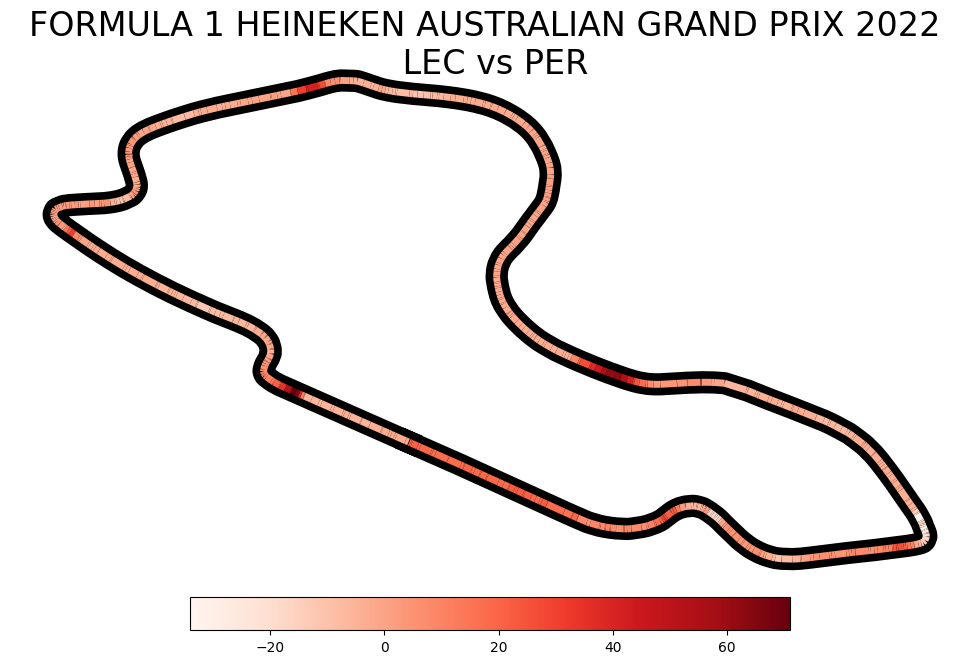

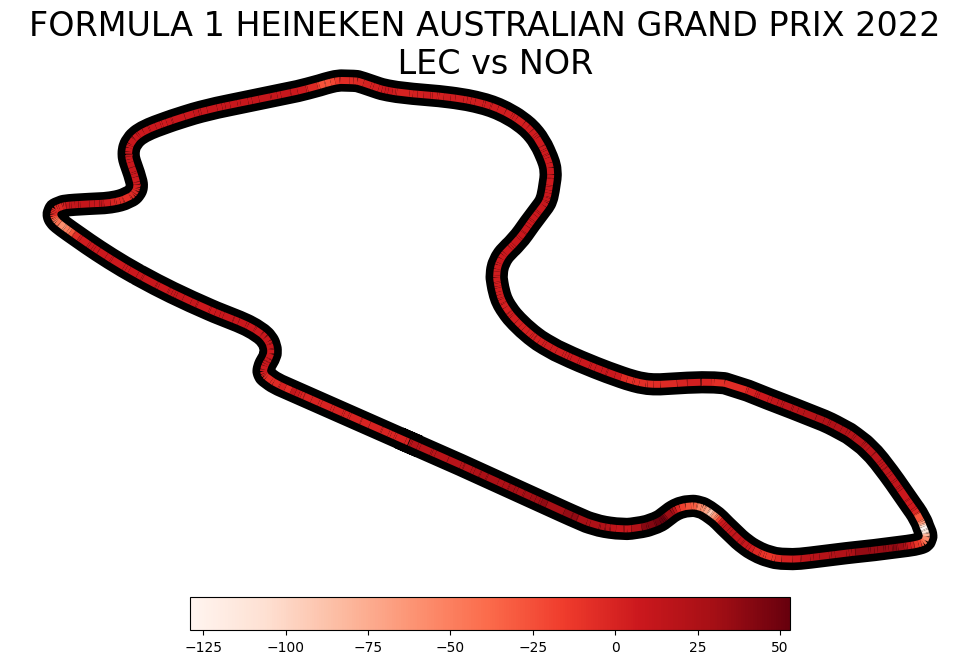

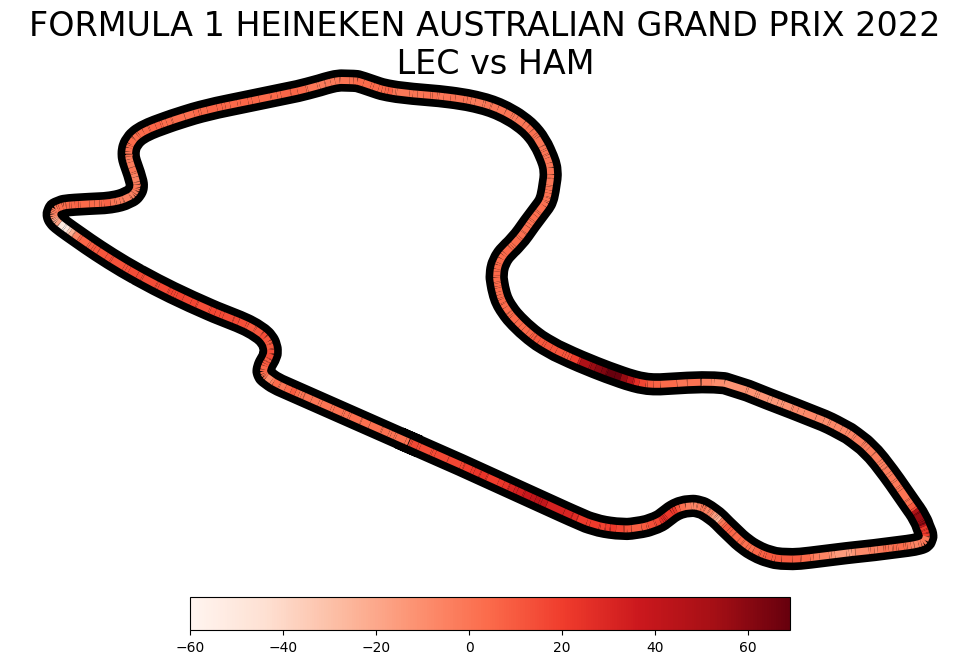

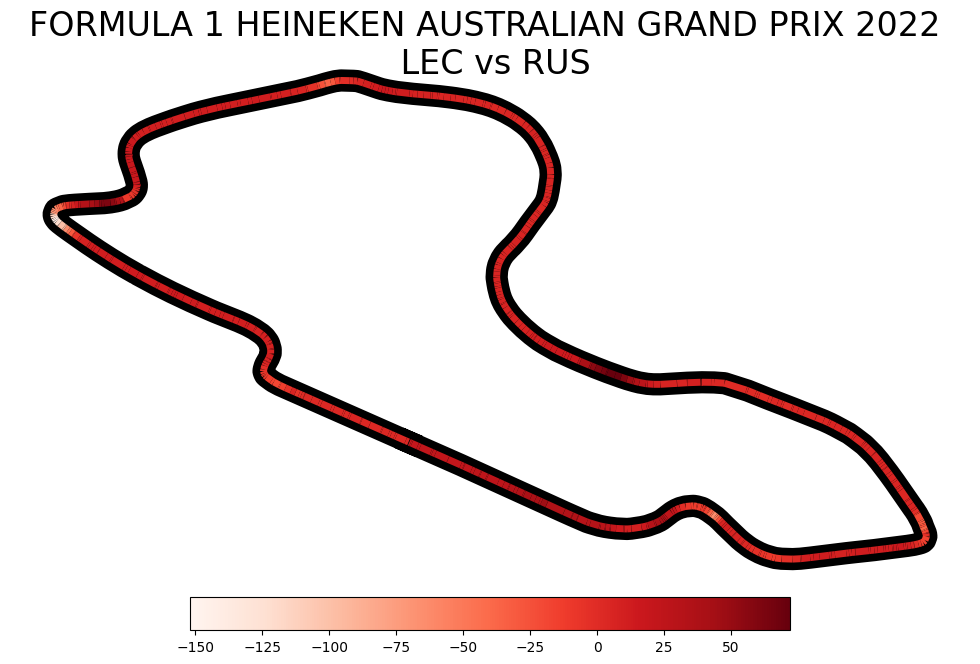

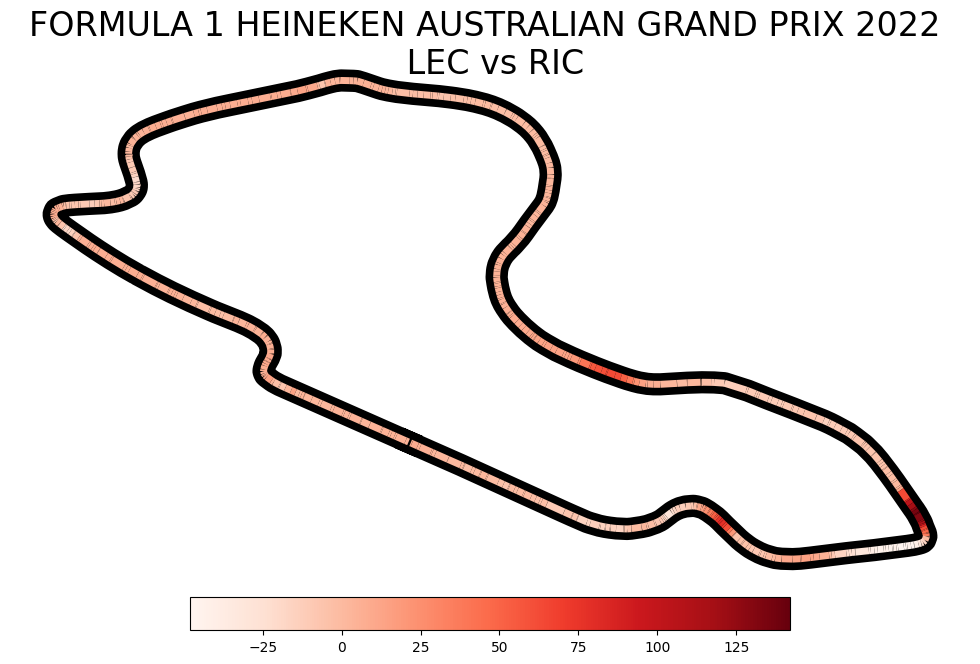

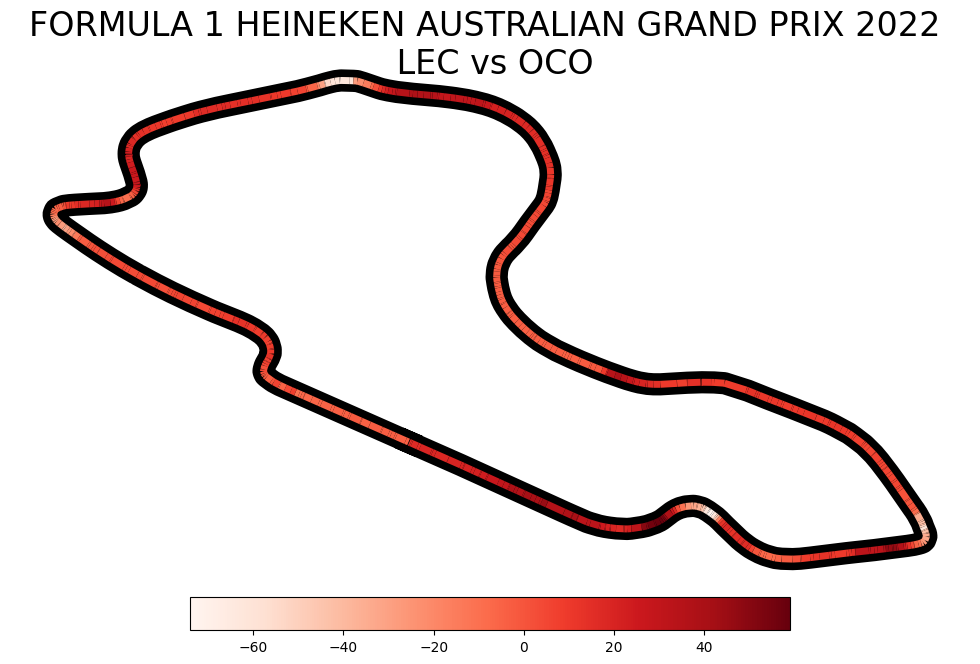

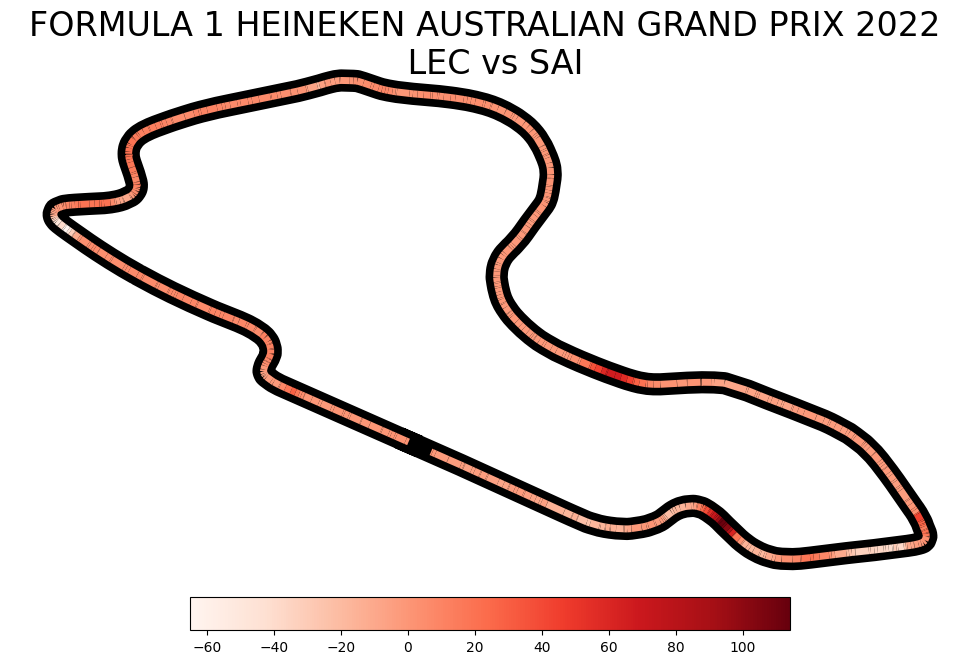

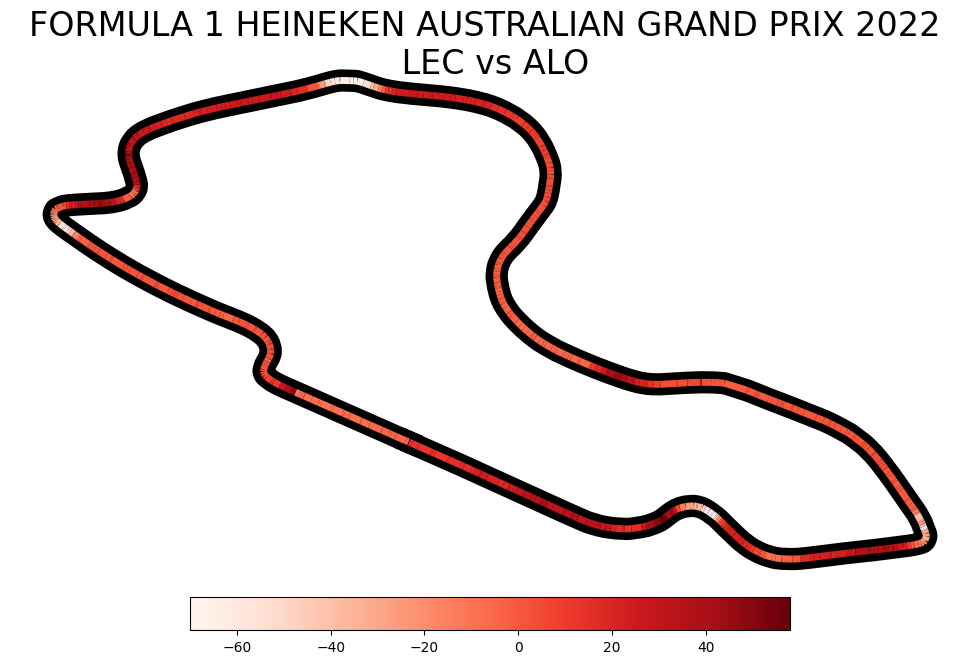

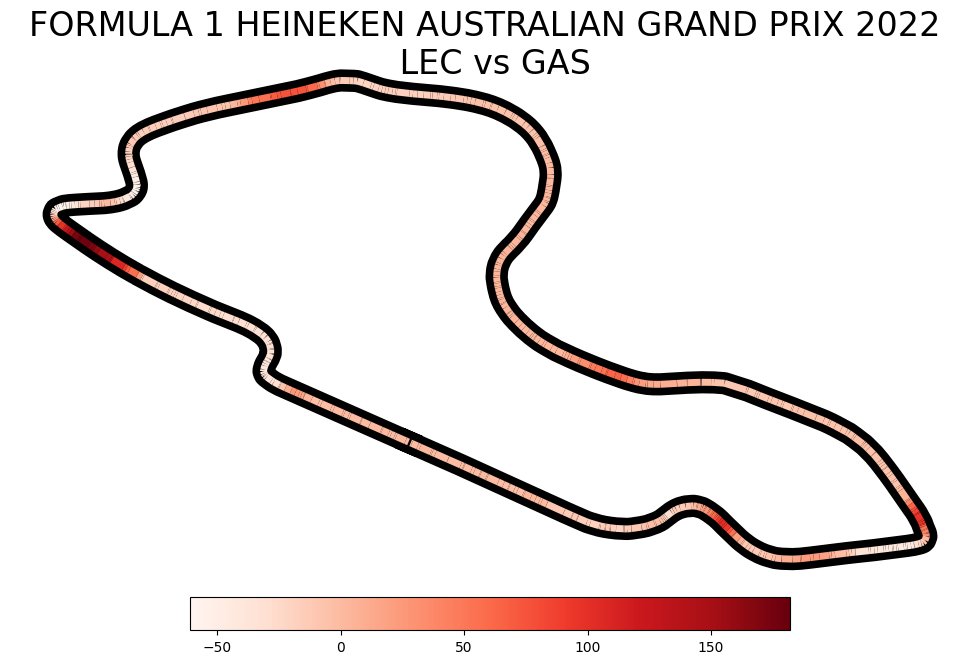

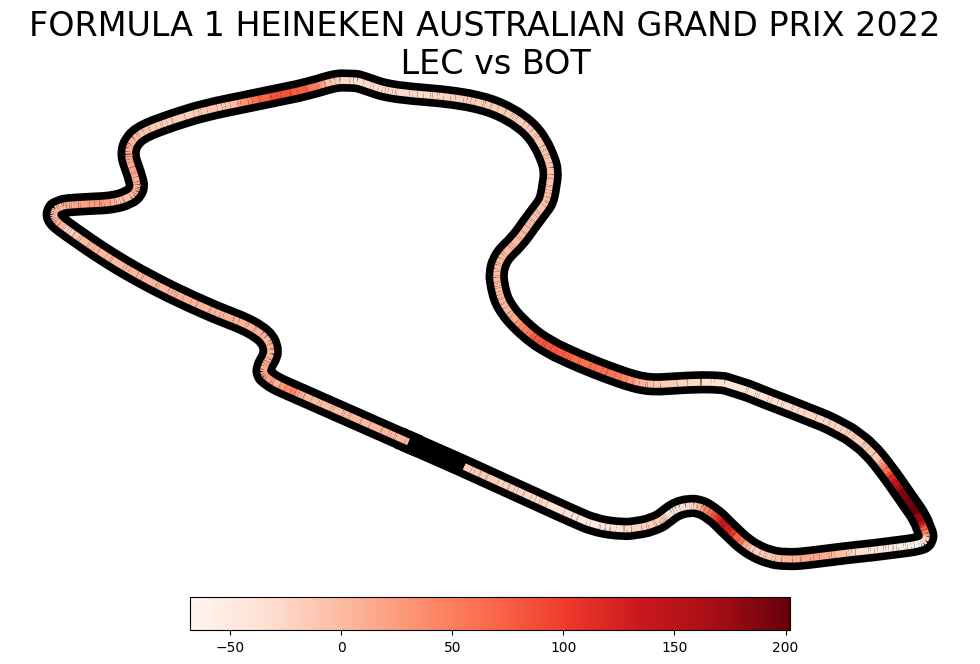

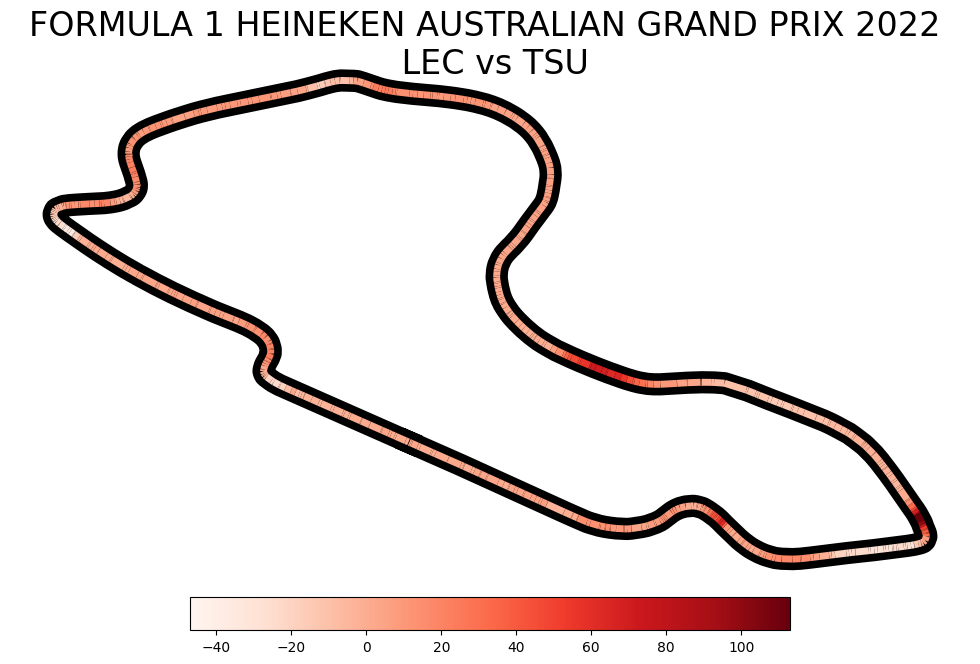

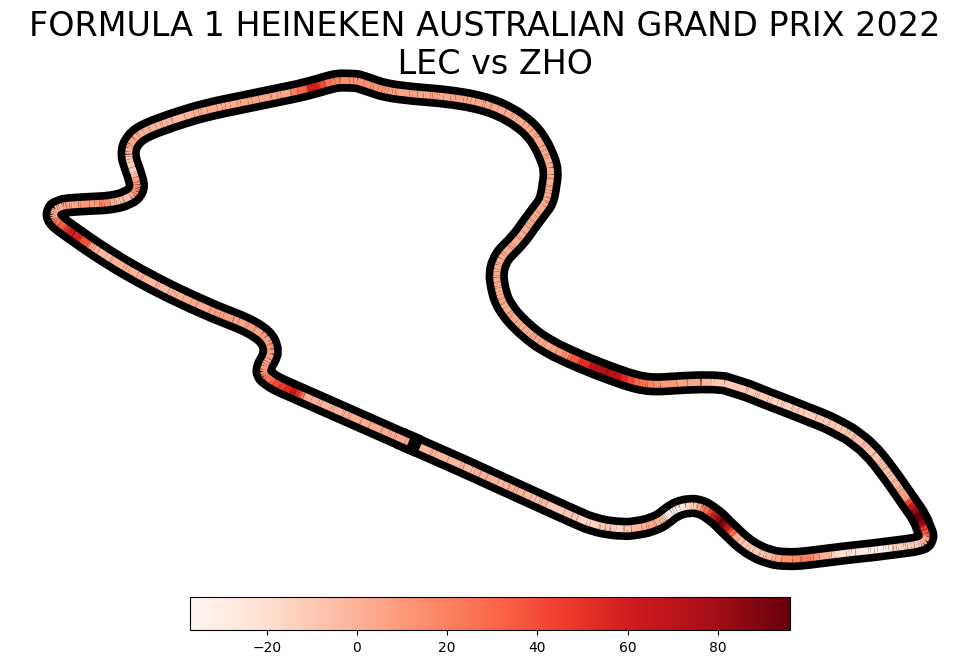

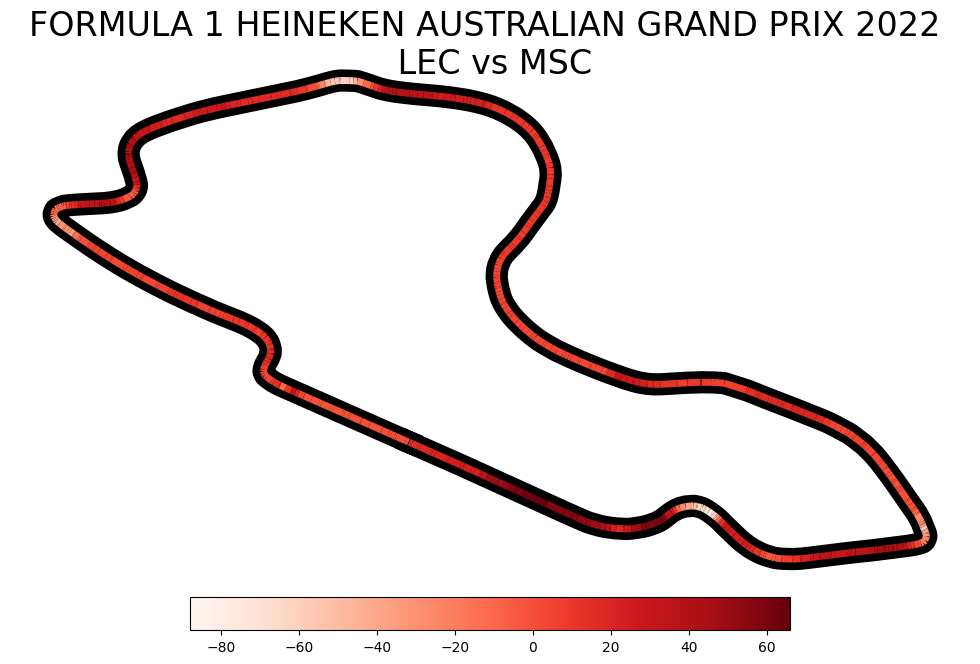

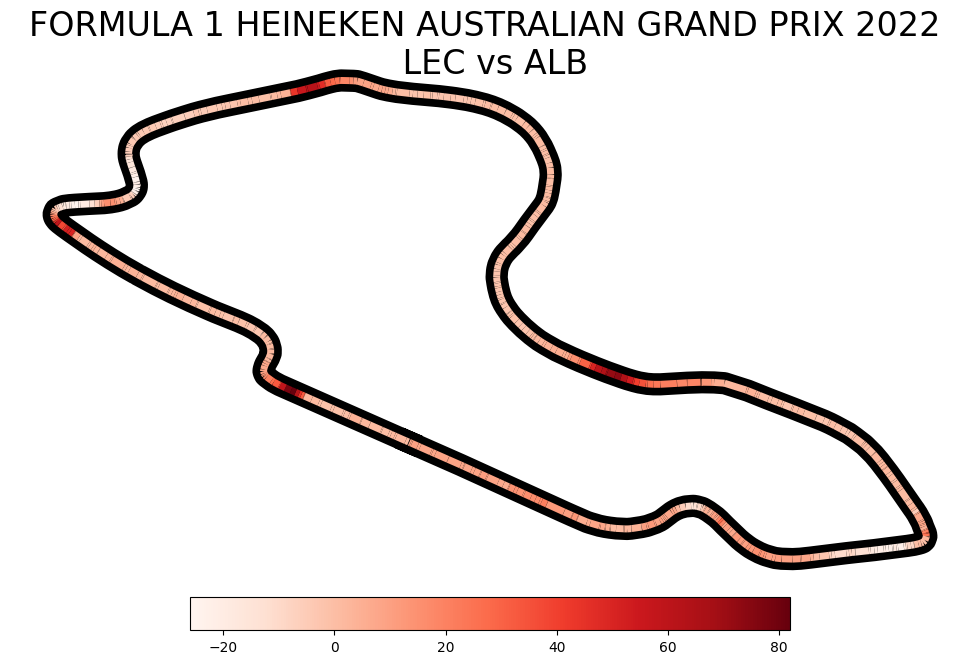

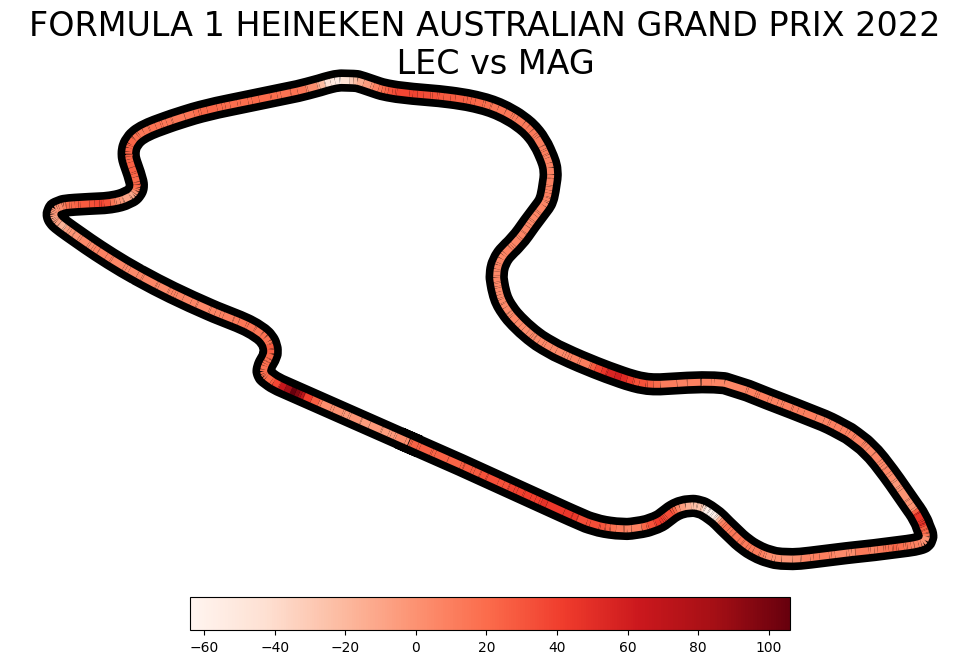

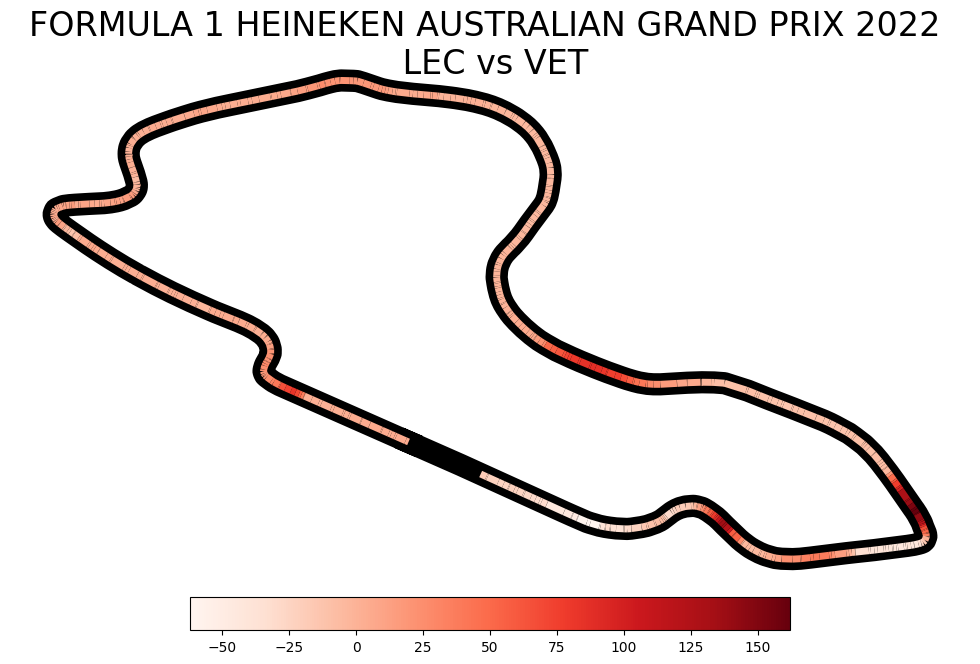

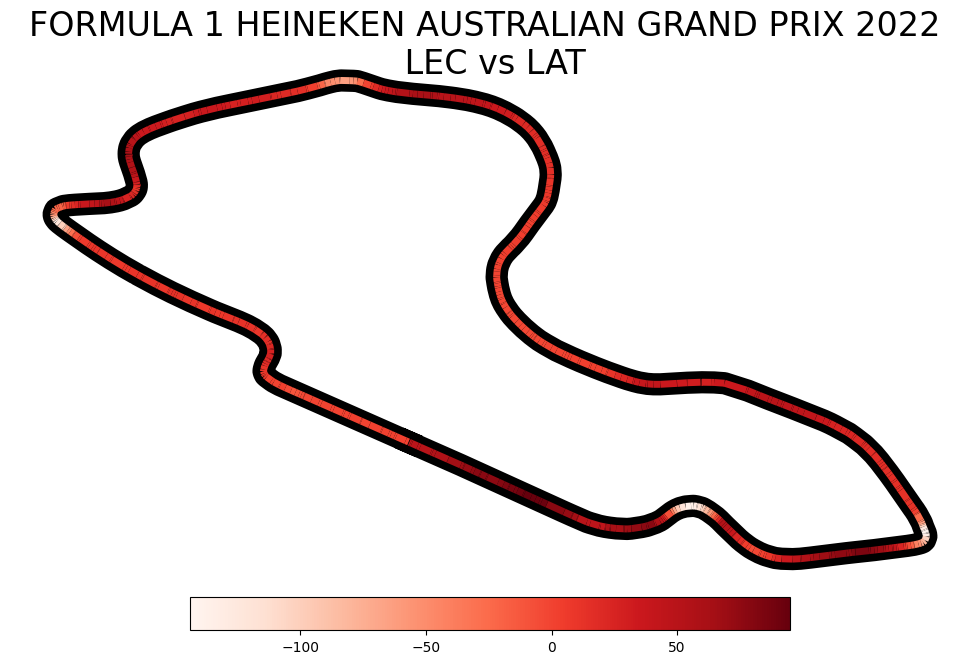

KeyError: nan

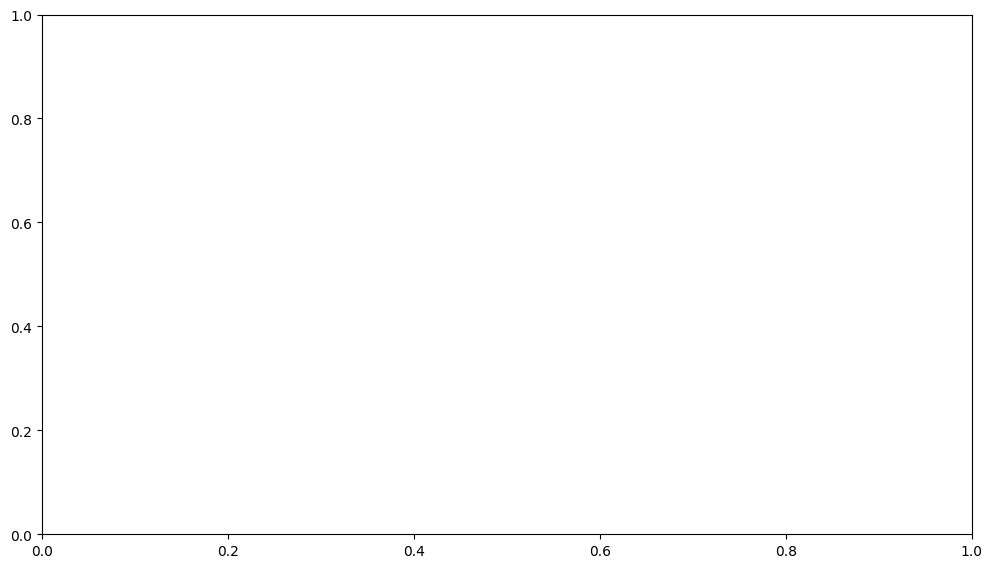

In [6]:
colormap = mpl.colormaps['Reds']

for i,driver in enumerate(las):
    fig, ax = plt.subplots(sharex=True, sharey=True, figsize=(12, 6.75))

    lap = session.laps.pick_driver(las[i])

    driver = session.get_driver(las[i])['Abbreviation']
    
    color = np.subtract(color_fast,lap.pick_fastest().telemetry["Speed"])

    fig.suptitle(f'{session.event.OfficialEventName} \n {driver_fast} vs {driver}', size=24, y=0.97)

    # Adjust margins and turn of axis
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.12)
    ax.axis('off')


    # After this, we plot the data itself.
    # Create background track line
    ax.plot(lap_fast.telemetry['X'], lap_fast.telemetry['Y'], color='black', linestyle='-', linewidth=16, zorder=0)

    # Create a continuous norm to map from data points to colors
    norm = plt.Normalize(color.min(), color.max())
    lc = LineCollection(segments, cmap=colormap, norm=norm, linestyle='-', linewidth=5)

    # Set the values used for colormapping
    lc.set_array(color)

    # Merge all line segments together
    line = ax.add_collection(lc)


    # Finally, we create a color bar as a legend.
    cbaxes = fig.add_axes([0.25, 0.05, 0.5, 0.05])
    normlegend = mpl.colors.Normalize(vmin=color.min(), vmax=color.max())
    legend = mpl.colorbar.ColorbarBase(cbaxes, norm=normlegend, cmap=colormap, orientation="horizontal")

    plt.savefig(f'Differences/{year}/{wknd}/{ses}/{driver_fast} vs {driver}.png')
    # Show the plot
    plt.show()

In [40]:
schedule = ff1.get_event_schedule(2020)

session = ff1.get_event(schedule['EventDate'][0].year,schedule['OfficialEventName'][0])

ff1.get_session(schedule['EventDate'][0].year,session['EventName'],"Q")

RoundNumber                                                          1
Country                                                        Austria
Location                                                     Spielberg
OfficialEventName    FORMULA 1 ROLEX GROSSER PREIS VON ÖSTERREICH 2020
EventDate                                          2020-07-05 00:00:00
EventName                                          Austrian Grand Prix
EventFormat                                               conventional
Session1                                                    Practice 1
Session1Date                                 2020-07-03 11:00:00+02:00
Session1DateUtc                                    2020-07-03 09:00:00
Session2                                                    Practice 2
Session2Date                                 2020-07-03 15:00:00+02:00
Session2DateUtc                                    2020-07-03 13:00:00
Session3                                                    Practice 3
Sessio

2020 Season Round 1: Austrian Grand Prix - Qualifying

In [63]:
schedule.shape

(19, 23)

core           INFO 	Loading data for Austrian Grand Prix - Qualifying [v3.0.7]
req            INFO 	Using cached data for driver_info


RoundNumber                                          0
Country                                          Spain
Location                                     Barcelona
OfficialEventName    FORMULA 1 PRE-SEASON TESTING 2020
EventDate                          2020-02-28 00:00:00
EventName                            Pre-Season Test 2
EventFormat                                    testing
Session1                                    Practice 1
Session1Date                 2020-02-26 09:00:00+01:00
Session1DateUtc                    2020-02-26 08:00:00
Session2                                    Practice 2
Session2Date                 2020-02-27 09:00:00+01:00
Session2DateUtc                    2020-02-27 08:00:00
Session3                                    Practice 3
Session3Date                 2020-02-28 09:00:00+01:00
Session3DateUtc                    2020-02-28 08:00:00
Session4                                          None
Session4Date                                       NaT
Session4Da

req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['77', '44', '33', '4', '23', '11', '16', '55', '18', '3', '5', '10', '26', '31', '8', '20', '63', '99', '7', '6']
core           INFO 	Loading data for Austrian Grand Prix - Qualifying [v3.0.7]
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for timing_da

RoundNumber                                                          1
Country                                                        Austria
Location                                                     Spielberg
OfficialEventName    FORMULA 1 ROLEX GROSSER PREIS VON ÖSTERREICH 2020
EventDate                                          2020-07-05 00:00:00
EventName                                          Austrian Grand Prix
EventFormat                                               conventional
Session1                                                    Practice 1
Session1Date                                 2020-07-03 11:00:00+02:00
Session1DateUtc                                    2020-07-03 09:00:00
Session2                                                    Practice 2
Session2Date                                 2020-07-03 15:00:00+02:00
Session2DateUtc                                    2020-07-03 13:00:00
Session3                                                    Practice 3
Sessio

req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['77', '44', '33', '4', '23', '11', '16', '55', '18', '3', '5', '10', '26', '31', '8', '20', '63', '99', '7', '6']
core           INFO 	Loading data for Austrian Grand Prix - Qualifying [v3.0.7]
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data


RoundNumber                                                          2
Country                                                        Austria
Location                                                     Spielberg
OfficialEventName    FORMULA 1 PIRELLI GROSSER PREIS DER STEIERMARK...
EventDate                                          2020-07-12 00:00:00
EventName                                           Styrian Grand Prix
EventFormat                                               conventional
Session1                                                    Practice 1
Session1Date                                 2020-07-10 11:00:00+02:00
Session1DateUtc                                    2020-07-10 09:00:00
Session2                                                    Practice 2
Session2Date                                 2020-07-10 15:00:00+02:00
Session2DateUtc                                    2020-07-10 13:00:00
Session3                                                    Practice 3
Sessio

req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['77', '44', '33', '4', '23', '11', '16', '55', '18', '3', '5', '10', '26', '31', '8', '20', '63', '99', '7', '6']
core           INFO 	Loading data for Austrian Grand Prix - Qualifying [v3.0.7]
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


RoundNumber                                             3
Country                                           Hungary
Location                                         Budapest
OfficialEventName    FORMULA 1 ARAMCO MAGYAR NAGYDÍJ 2020
EventDate                             2020-07-19 00:00:00
EventName                            Hungarian Grand Prix
EventFormat                                  conventional
Session1                                       Practice 1
Session1Date                    2020-07-17 11:00:00+02:00
Session1DateUtc                       2020-07-17 09:00:00
Session2                                       Practice 2
Session2Date                    2020-07-17 15:00:00+02:00
Session2DateUtc                       2020-07-17 13:00:00
Session3                                       Practice 3
Session3Date                    2020-07-18 12:00:00+02:00
Session3DateUtc                       2020-07-18 10:00:00
Session4                                       Qualifying
Session4Date  

req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['77', '44', '33', '4', '23', '11', '16', '55', '18', '3', '5', '10', '26', '31', '8', '20', '63', '99', '7', '6']
core           INFO 	Loading data for Austrian Grand Prix - Qualifying [v3.0.7]
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data


RoundNumber                                                  4
Country                                          Great Britain
Location                                           Silverstone
OfficialEventName    FORMULA 1 PIRELLI BRITISH GRAND PRIX 2020
EventDate                                  2020-08-02 00:00:00
EventName                                   British Grand Prix
EventFormat                                       conventional
Session1                                            Practice 1
Session1Date                         2020-07-31 11:00:00+01:00
Session1DateUtc                            2020-07-31 10:00:00
Session2                                            Practice 2
Session2Date                         2020-07-31 15:00:00+01:00
Session2DateUtc                            2020-07-31 14:00:00
Session3                                            Practice 3
Session3Date                         2020-08-01 11:00:00+01:00
Session3DateUtc                            2020-08-01 1

req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['77', '44', '33', '4', '23', '11', '16', '55', '18', '3', '5', '10', '26', '31', '8', '20', '63', '99', '7', '6']
core           INFO 	Loading data for Austrian Grand Prix - Qualifying [v3.0.7]
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data


RoundNumber                                                          5
Country                                                  Great Britain
Location                                                   Silverstone
OfficialEventName    EMIRATES FORMULA 1 70TH ANNIVERSARY GRAND PRIX...
EventDate                                          2020-08-09 00:00:00
EventName                                  70th Anniversary Grand Prix
EventFormat                                               conventional
Session1                                                    Practice 1
Session1Date                                 2020-08-07 11:00:00+01:00
Session1DateUtc                                    2020-08-07 10:00:00
Session2                                                    Practice 2
Session2Date                                 2020-08-07 15:00:00+01:00
Session2DateUtc                                    2020-08-07 14:00:00
Session3                                                    Practice 3
Sessio

req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['77', '44', '33', '4', '23', '11', '16', '55', '18', '3', '5', '10', '26', '31', '8', '20', '63', '99', '7', '6']
core           INFO 	Loading data for Austrian Grand Prix - Qualifying [v3.0.7]
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data


RoundNumber                                                    6
Country                                                    Spain
Location                                               Barcelona
OfficialEventName    FORMULA 1 ARAMCO GRAN PREMIO DE ESPAÑA 2020
EventDate                                    2020-08-16 00:00:00
EventName                                     Spanish Grand Prix
EventFormat                                         conventional
Session1                                              Practice 1
Session1Date                           2020-08-14 11:00:00+02:00
Session1DateUtc                              2020-08-14 09:00:00
Session2                                              Practice 2
Session2Date                           2020-08-14 15:00:00+02:00
Session2DateUtc                              2020-08-14 13:00:00
Session3                                              Practice 3
Session3Date                           2020-08-15 12:00:00+02:00
Session3DateUtc          

req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['77', '44', '33', '4', '23', '11', '16', '55', '18', '3', '5', '10', '26', '31', '8', '20', '63', '99', '7', '6']
core           INFO 	Loading data for Austrian Grand Prix - Qualifying [v3.0.7]
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...


RoundNumber                                                7
Country                                              Belgium
Location                                   Spa-Francorchamps
OfficialEventName    FORMULA 1 ROLEX BELGIAN GRAND PRIX 2020
EventDate                                2020-08-30 00:00:00
EventName                                 Belgian Grand Prix
EventFormat                                     conventional
Session1                                          Practice 1
Session1Date                       2020-08-28 11:00:00+02:00
Session1DateUtc                          2020-08-28 09:00:00
Session2                                          Practice 2
Session2Date                       2020-08-28 15:00:00+02:00
Session2DateUtc                          2020-08-28 13:00:00
Session3                                          Practice 3
Session3Date                       2020-08-29 12:00:00+02:00
Session3DateUtc                          2020-08-29 10:00:00
Session4                

req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['77', '44', '33', '4', '23', '11', '16', '55', '18', '3', '5', '10', '26', '31', '8', '20', '63', '99', '7', '6']
core           INFO 	Loading data for Austrian Grand Prix - Qualifying [v3.0.7]
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data


RoundNumber                                                     8
Country                                                     Italy
Location                                                    Monza
OfficialEventName    FORMULA 1 GRAN PREMIO HEINEKEN D’ITALIA 2020
EventDate                                     2020-09-06 00:00:00
EventName                                      Italian Grand Prix
EventFormat                                          conventional
Session1                                               Practice 1
Session1Date                            2020-09-04 11:00:00+02:00
Session1DateUtc                               2020-09-04 09:00:00
Session2                                               Practice 2
Session2Date                            2020-09-04 15:00:00+02:00
Session2DateUtc                               2020-09-04 13:00:00
Session3                                               Practice 3
Session3Date                            2020-09-05 12:00:00+02:00
Session3Da

req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['77', '44', '33', '4', '23', '11', '16', '55', '18', '3', '5', '10', '26', '31', '8', '20', '63', '99', '7', '6']
core           INFO 	Loading data for Austrian Grand Prix - Qualifying [v3.0.7]
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data


RoundNumber                                                          9
Country                                                          Italy
Location                                                       Mugello
OfficialEventName    FORMULA 1 PIRELLI GRAN PREMIO DELLA TOSCANA FE...
EventDate                                          2020-09-13 00:00:00
EventName                                            Tuscan Grand Prix
EventFormat                                               conventional
Session1                                                    Practice 1
Session1Date                                 2020-09-11 11:00:00+02:00
Session1DateUtc                                    2020-09-11 09:00:00
Session2                                                    Practice 2
Session2Date                                 2020-09-11 15:00:00+02:00
Session2DateUtc                                    2020-09-11 13:00:00
Session3                                                    Practice 3
Sessio

req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['77', '44', '33', '4', '23', '11', '16', '55', '18', '3', '5', '10', '26', '31', '8', '20', '63', '99', '7', '6']
core           INFO 	Loading data for Austrian Grand Prix - Qualifying [v3.0.7]
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data


RoundNumber                                             10
Country                                             Russia
Location                                             Sochi
OfficialEventName    FORMULA 1 VTB RUSSIAN GRAND PRIX 2020
EventDate                              2020-09-27 00:00:00
EventName                               Russian Grand Prix
EventFormat                                   conventional
Session1                                        Practice 1
Session1Date                     2020-09-25 11:00:00+03:00
Session1DateUtc                        2020-09-25 08:00:00
Session2                                        Practice 2
Session2Date                     2020-09-25 15:00:00+03:00
Session2DateUtc                        2020-09-25 12:00:00
Session3                                        Practice 3
Session3Date                     2020-09-26 12:00:00+03:00
Session3DateUtc                        2020-09-26 09:00:00
Session4                                        Qualifyi

req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['77', '44', '33', '4', '23', '11', '16', '55', '18', '3', '5', '10', '26', '31', '8', '20', '63', '99', '7', '6']
core           INFO 	Loading data for Austrian Grand Prix - Qualifying [v3.0.7]
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data


RoundNumber                                                     11
Country                                                    Germany
Location                                               Nürburgring
OfficialEventName    FORMULA 1 ARAMCO GROSSER PREIS DER EIFEL 2020
EventDate                                      2020-10-11 00:00:00
EventName                                         Eifel Grand Prix
EventFormat                                           conventional
Session1                                                Practice 1
Session1Date                             2020-10-09 11:00:00+02:00
Session1DateUtc                                2020-10-09 09:00:00
Session2                                                Practice 2
Session2Date                             2020-10-09 15:00:00+02:00
Session2DateUtc                                2020-10-09 13:00:00
Session3                                                Practice 3
Session3Date                             2020-10-10 12:00:00+0

req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['77', '44', '33', '4', '23', '11', '16', '55', '18', '3', '5', '10', '26', '31', '8', '20', '63', '99', '7', '6']
core           INFO 	Loading data for Austrian Grand Prix - Qualifying [v3.0.7]
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data


RoundNumber                                                         12
Country                                                       Portugal
Location                                                      Portimão
OfficialEventName    FORMULA 1 HEINEKEN GRANDE PRÉMIO DE PORTUGAL 2020
EventDate                                          2020-10-25 00:00:00
EventName                                        Portuguese Grand Prix
EventFormat                                               conventional
Session1                                                    Practice 1
Session1Date                                 2020-10-23 11:00:00+00:00
Session1DateUtc                                    2020-10-23 11:00:00
Session2                                                    Practice 2
Session2Date                                 2020-10-23 15:00:00+00:00
Session2DateUtc                                    2020-10-23 15:00:00
Session3                                                    Practice 3
Sessio

req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['77', '44', '33', '4', '23', '11', '16', '55', '18', '3', '5', '10', '26', '31', '8', '20', '63', '99', '7', '6']
core           INFO 	Loading data for Austrian Grand Prix - Qualifying [v3.0.7]
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data


RoundNumber                                                         13
Country                                                          Italy
Location                                                         Imola
OfficialEventName    FORMULA 1 EMIRATES GRAN PREMIO DELL'EMILIA ROM...
EventDate                                          2020-11-01 00:00:00
EventName                                    Emilia Romagna Grand Prix
EventFormat                                               conventional
Session1                                                    Practice 1
Session1Date                                 2020-10-31 10:00:00+01:00
Session1DateUtc                                    2020-10-31 09:00:00
Session2                                                              
Session2Date                                                       NaT
Session2DateUtc                                                    NaT
Session3                                                              
Sessio

req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['77', '44', '33', '4', '23', '11', '16', '55', '18', '3', '5', '10', '26', '31', '8', '20', '63', '99', '7', '6']
core           INFO 	Loading data for Austrian Grand Prix - Qualifying [v3.0.7]
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data


RoundNumber                                             14
Country                                             Turkey
Location                                          Istanbul
OfficialEventName    FORMULA 1 DHL TURKISH GRAND PRIX 2020
EventDate                              2020-11-15 00:00:00
EventName                               Turkish Grand Prix
EventFormat                                   conventional
Session1                                        Practice 1
Session1Date                     2020-11-13 11:00:00+03:00
Session1DateUtc                        2020-11-13 08:00:00
Session2                                        Practice 2
Session2Date                     2020-11-13 15:00:00+03:00
Session2DateUtc                        2020-11-13 12:00:00
Session3                                        Practice 3
Session3Date                     2020-11-14 12:00:00+03:00
Session3DateUtc                        2020-11-14 09:00:00
Session4                                        Qualifyi

req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['77', '44', '33', '4', '23', '11', '16', '55', '18', '3', '5', '10', '26', '31', '8', '20', '63', '99', '7', '6']
core           INFO 	Loading data for Austrian Grand Prix - Qualifying [v3.0.7]
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data


RoundNumber                                                  15
Country                                                 Bahrain
Location                                                 Sakhir
OfficialEventName    FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2020
EventDate                                   2020-11-29 00:00:00
EventName                                    Bahrain Grand Prix
EventFormat                                        conventional
Session1                                             Practice 1
Session1Date                          2020-11-27 14:00:00+03:00
Session1DateUtc                             2020-11-27 11:00:00
Session2                                             Practice 2
Session2Date                          2020-11-27 18:00:00+03:00
Session2DateUtc                             2020-11-27 15:00:00
Session3                                             Practice 3
Session3Date                          2020-11-28 14:00:00+03:00
Session3DateUtc                         

req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['77', '44', '33', '4', '23', '11', '16', '55', '18', '3', '5', '10', '26', '31', '8', '20', '63', '99', '7', '6']
core           INFO 	Loading data for Austrian Grand Prix - Qualifying [v3.0.7]
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data


RoundNumber                                              16
Country                                             Bahrain
Location                                             Sakhir
OfficialEventName    FORMULA 1 ROLEX SAKHIR GRAND PRIX 2020
EventDate                               2020-12-06 00:00:00
EventName                                 Sakhir Grand Prix
EventFormat                                    conventional
Session1                                         Practice 1
Session1Date                      2020-12-04 16:30:00+03:00
Session1DateUtc                         2020-12-04 13:30:00
Session2                                         Practice 2
Session2Date                      2020-12-04 20:30:00+03:00
Session2DateUtc                         2020-12-04 17:30:00
Session3                                         Practice 3
Session3Date                      2020-12-05 17:00:00+03:00
Session3DateUtc                         2020-12-05 14:00:00
Session4                                

req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['77', '44', '33', '4', '23', '11', '16', '55', '18', '3', '5', '10', '26', '31', '8', '20', '63', '99', '7', '6']
core           INFO 	Loading data for Austrian Grand Prix - Qualifying [v3.0.7]
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data


RoundNumber                                                         17
Country                                                      Abu Dhabi
Location                                                    Yas Island
OfficialEventName    FORMULA 1 ETIHAD AIRWAYS ABU DHABI GRAND PRIX ...
EventDate                                          2020-12-13 00:00:00
EventName                                         Abu Dhabi Grand Prix
EventFormat                                               conventional
Session1                                                    Practice 1
Session1Date                                 2020-12-11 13:00:00+04:00
Session1DateUtc                                    2020-12-11 09:00:00
Session2                                                    Practice 2
Session2Date                                 2020-12-11 17:00:00+04:00
Session2DateUtc                                    2020-12-11 13:00:00
Session3                                                    Practice 3
Sessio

req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['77', '44', '33', '4', '23', '11', '16', '55', '18', '3', '5', '10', '26', '31', '8', '20', '63', '99', '7', '6']


In [67]:
last

2020 Season Round 1: Austrian Grand Prix - Qualifying

In [ ]:
last.